correctly classified:  {'yes': 156, 'down': 106, 'right': 139, 'no': 77, 'left': 110, 'up': 87, 'on': 101, 'off': 147, 'stop': 138, 'go': 125}
incorrectly classified:  {'yes': 44, 'down': 94, 'right': 61, 'no': 123, 'left': 90, 'up': 113, 'on': 99, 'off': 53, 'stop': 62, 'go': 75}
true labels:  2000
predicted labels:  2000
accuracy:   0.593
Confusion matrix, without normalization


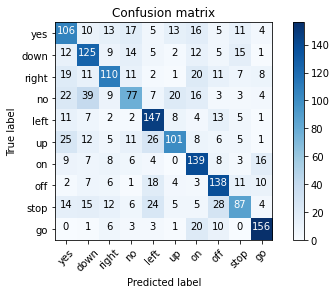

In [1]:
from IsolatedWordRecognizer import IsolatedWordRecognizer
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import metrics
import itertools

mfccDataPath = "mfcc/transform/data/"

wordsToRecognize = ["yes", "down", "right", "no", "left", "up", "on", "off", "stop", "go"]
isolatedWordRecognizers = {}

for word in wordsToRecognize:
    isolatedWordRecognizers[word] = IsolatedWordRecognizer(word)

#https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def getTestDataForWord(word):
    testDataSet = []
    testDirectory = mfccDataPath + word + "/test/"
    count = 0
    for file in os.listdir(testDirectory):
        if count < 200:  # settling for 200 data points as that is almost all of them
            npyFileName = os.fsdecode(file)
            features = np.load(testDirectory + npyFileName)
            testDataSet.append(features)
            count += 1
            
    return testDataSet

labelAndData = {}
for word in wordsToRecognize:
        labelAndData[word] = getTestDataForWord(word)
        isolatedWordRecognizers[word].loadModel()
    
correctlyClassified = {"yes": 0, "down": 0, "right": 0, "no": 0, "left": 0, "up": 0, "on": 0, "off": 0, "stop": 0, "go": 0}
incorrectlyClassified = {"yes": 0, "down": 0, "right": 0, "no": 0, "left": 0, "up": 0, "on": 0, "off": 0, "stop": 0, "go": 0}

trueLabels = []
predictedLabels = []
for word in wordsToRecognize:
    label = word
    data = getTestDataForWord(word)
    for dataPoint in data:
        trueLabels.append(label)
        recognizerScores = {}
        for hmmWord in wordsToRecognize:
            recognizerScores[hmmWord] = isolatedWordRecognizers[hmmWord].evaluateDataPoint(dataPoint)
        
        predicted = max(recognizerScores, key=recognizerScores.get)
        predictedLabels.append(predicted)
        # print("label: ", label, "predicted: ", predicted)
        
        if predicted == label:
            correctlyClassified[label] += 1
        else: 
            incorrectlyClassified[label] += 1

print("correctly classified: ", correctlyClassified)
print("incorrectly classified: ", incorrectlyClassified)
print("true labels: ", len(trueLabels))
print("predicted labels: ", len(predictedLabels))

score = metrics.accuracy_score(trueLabels, predictedLabels)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(trueLabels, predictedLabels)
plot_confusion_matrix(cm, classes=wordsToRecognize)
